In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.io as spio

# Bayesian linear regression

In this exercise session we consider the supervised regression problem of finding a function $f(x)$ that describes the relationship between a scalar input $x$ and a scalar output $y$:

$$
y = f(x) + \epsilon, \qquad \epsilon \sim \mathcal{N}(0, \beta^{-1}).
$$

We model this with a Bayesian linear regression model

$$
f(x) = \boldsymbol{\phi}(x)^{\mathsf{T}} \mathbf{w}, \qquad \mathbf{w} \sim \mathcal{N}(\boldsymbol{\mu}_0, \mathbf{S}_0),
$$

where $\boldsymbol{\phi}(x)$ is a vector of the input features.
Note that we used the notation $\mathbf{x}$ for the input features in the lecture.
We changed this notation to $\boldsymbol{\phi}(x)$ here in order to not mix it up with the scalar input $x$.

The Bayesian linear regression model is then given by

$$
\begin{aligned}
p(\mathbf{y} \,|\, \mathbf{w}) &= \mathcal{N}(\mathbf{y}; \boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I}_N) \qquad && \text{(likelihood)}, \\
p(\mathbf{w}) &= \mathcal{N}(\mathbf{w}; \mathbf{m}_0, \mathbf{S}_0) \qquad && \text{(prior)},
\end{aligned}
$$

where

$$
\boldsymbol{\Phi} = \begin{bmatrix} \boldsymbol{\phi}(x_1)^{\mathsf{T}} \\ \vdots \\ \boldsymbol{\phi}(x_N)^{\mathsf{T}} \end{bmatrix}
\qquad \text{and} \qquad
\mathbf{y} = \begin{bmatrix} y_1 \\ \vdots \\ y_N \end{bmatrix}.
$$

Given a set of training data of inputs and outputs $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^N$, we are interested in finding the posterior of the weights $p(\mathbf{w} \,|\, \mathbf{y})$ and also the predictive distribution $p(f(x_{\star}) \,|\, \mathbf{y})$ of unseen input $x_{\star}$.
For further information about the Bayesian linear regression model see Lecture 3 and/or Christopher Bishop's book ["Pattern recognition and machine learning"](https://www.microsoft.com/en-us/research/publication/pattern-recognition-machine-learning/).


## Exercise 3.1: Understanding the code

Download the files <a href="https://uni-tuebingen.de/fileadmin/Uni_Tuebingen/Fakultaeten/MatNat/Fachbereiche/Informatik/Lehrstuehle/MethMaschLern/Probabilistic_ML/Notebook_Vorlesung_7___9/lindata.mat" download="lindata.mat">`lindata.mat`</a> and <a href="https://uni-tuebingen.de/fileadmin/Uni_Tuebingen/Fakultaeten/MatNat/Fachbereiche/Informatik/Lehrstuehle/MethMaschLern/Probabilistic_ML/Notebook_Vorlesung_7___9/nlindata.mat" download="nlindata.mat">`nlindata.mat`</a> and save them to the folder of this notebook.
These datasets are borrowed from Philipp Hennig's course ["Probabilistic machine learning"](https://uni-tuebingen.de/en/180804), given at the University of Tübingen.

The following code cell loads inputs, outputs, and precision parameter from `lindata.mat` and plots the feature vector

$$
\boldsymbol{\phi}(x)^{\mathsf{T}} = [1, x].
$$

(20,)
[ -3.9555788  -10.20466854  -4.07732766  -3.80423523  -5.54641695
  -6.49758779   2.50363387  -4.84736199   0.21816925   1.52647205
  -0.59432226   0.92732946   5.04358645   1.77229585   5.75286021
   4.00196636   1.03961295   6.97788739   4.15119207   7.14118806]
0.4444444444444444


C:\Users\caleb\AppData\Local\Temp\ipykernel_83752\1393997183.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  beta = float(data["sigma"])**(-2)# measurement noise precision


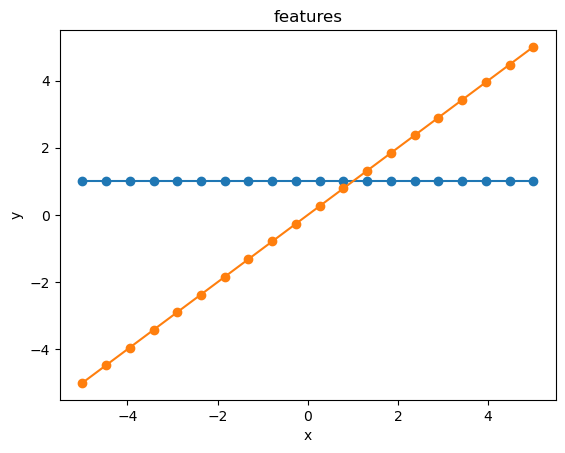

In [24]:
# Load data from disk
# File should be in the same folder as the Jupyter notebook,
# otherwise you have to adjust the path
data = spio.loadmat("lindata.mat")
x = data["X"].flatten() # inputs
y = data["Y"].flatten() # outputs
print(x.shape)
print(y)
beta = float(data["sigma"])**(-2)# measurement noise precision
print(beta)
N = x.size

# Define the feature vector
def Phi(a):  # Phi(a) = [1, a]
    return np.power(np.reshape(a, (-1, 1)), range(2))

# Plot the features
plt.plot(x, Phi(x), '-o')
plt.title('features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We then compute the posterior distribution of the weights $\mathbf{w}$ of a Bayesian linear regression model using these features.

In [25]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D = Phi(0).size  # number of features
m0 = np.zeros(D)
S0 = 10*np.eye(D) / D
print(S0)

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
print(Phi(x).shape)
SN = np.linalg.inv(np.linalg.inv(S0) + beta * Phi(x).T @ Phi(x))
mN = SN @ (np.linalg.inv(S0) @ m0 + beta * Phi(x).T @ y)

[[5. 0.]
 [0. 5.]]
(20, 2)


We visualize the posterior distribution by plotting the functions $f$ corresponding to different samples of $\mathbf{w}$.

(5, 2)


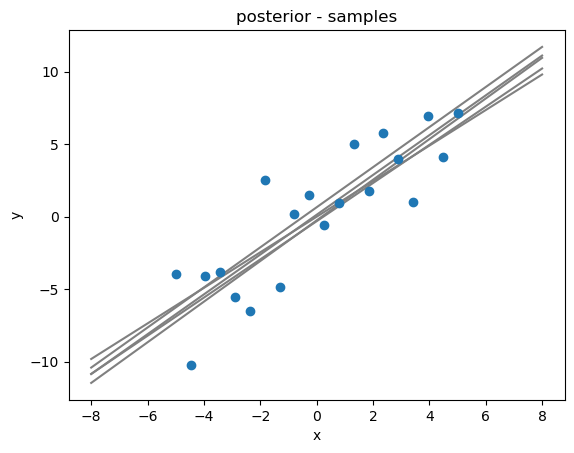

In [26]:
# Generate grid of new inputs x* for plotting
n = 100  # number of grid-points
xs = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws = stats.multivariate_normal(mean=mN, cov=SN, allow_singular=True).rvs(samples, random_state=seed)
print(ws.shape)

# Compute corresponding values f(x*)
fs = Phi(xs) @ ws.T

# Plot the samples
plt.plot(xs, fs, 'gray') # samples
plt.scatter(x, y, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Next we plot samples from and credibility regions of the predictive distribution.

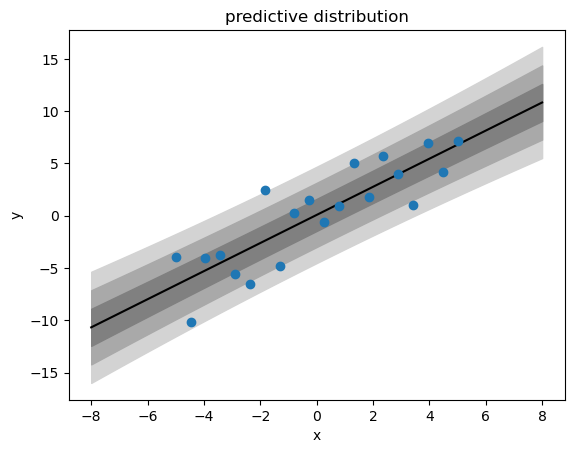

In [27]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar = Phi(xs) @ mN
Sstar = Phi(xs) @ SN @ Phi(xs).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred= np.sqrt(np.diag(Sstar))

# Plot credibility regions
plt.plot(xs, mstar, 'black') # predictive mean
plt.fill_between(xs, mstar + 3*stdpred, mstar - 3*stdpred, color='lightgray')
plt.fill_between(xs, mstar + 2*stdpred, mstar - 2*stdpred, color='darkgray')
plt.fill_between(xs, mstar + 1*stdpred, mstar - 1*stdpred, color='gray')
plt.scatter(x, y, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (a)

Go through the code and make sure that you can map the code to the model and regression method explained in Lecture 3.
Also run the code.
Make sure you understand the figures.

We have a model 
$$
\begin{aligned}
p(\mathbf{y} \,|\, \mathbf{w}) &= \mathcal{N}(\mathbf{y}; \boldsymbol{\Phi}\mathbf{w}, \beta^{-1}\mathbf{I}_N) \qquad && \text{(likelihood)}, \\
p(\mathbf{w}) &= \mathcal{N}(\mathbf{w}; \mathbf{m}_0, \mathbf{S}_0) \qquad && \text{(prior)},
\end{aligned}
$$
$\boldsymbol{\Phi} = $ Phi(a) function which will take in our input x and convert it to a [1, x] vector where 1 is a bias term and x is a feature  
$\boldsymbol{\beta^{-1}}$ is a known precision which is, beta = float(data["sigma"])**(-2) = 0.444, in the code  
$\boldsymbol{w}$ are the weights which come from a prior which is $\mathcal{N}(\mathbf{w}; \mathbf{m}_0, \mathbf{S}_0)$  
$\boldsymbol{m}_0 = [0,0]^T$ and $\boldsymbol{S_0} = [[5,0],[0,5]]$  
Corollary 1 states:  
$p(x_a) \sim \mathcal{N}(x_a; \mu_a, \Sigma_a)$  
$p(x_b|x_a) \sim \mathcal{N}(x_b; Ax_a + b, \Sigma_{b|a})$  
then  
$p(x_a|x_b) \sim \mathcal{N}(x_a; \mu_{a|b}, \Sigma_{a|b})$  
$\Sigma_{a|b} = (\Sigma_a^{-1} +A^T\Sigma_{b|a}^{-1}A)^{-1}$  
$\mu_{a|b} = \Sigma_{a|b}(\Sigma_a^{-1}\mu_a + A^T\Sigma_{b|a}^{-1}(x_b-b))$  
and for this problem  
$x_a = w$  
$x_b = y$  
$A =$ Phi(a) and technically this groups b into it as it is $[1,x]$  
$\Sigma_{b|a} = \beta = 0.4444$  
$\mu_a = m_0 = [0,0] $  
$\Sigma_a = S_0 = [[5,0],[0,5]]$   
  
    

Note $\beta^{-1}$ is a constant here because we multiply it by $\mathbf{I}_N$ where N is the number of data points. In Corollary 1 we multiply by $A^T\Sigma_{b|a}^{-1}A$ but since $\Sigma_{b|a}$ is a diagonal matrix with all values $\beta^{-1}$ it is the same as $\beta^{-1}A^TA$ which is how it is written in the code

### (b)

Reduce the training data to only the first 5 data points in the training data.
What impact does this have on the predictive distribution?

In [33]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D = Phi(0).size  # number of features
m0 = np.zeros(D)
S0 = 10*np.eye(D) / D
print(S0)

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
x1 = x[:5]
y1 = y[:5]
print(x1.shape)
SN1 = np.linalg.inv(np.linalg.inv(S0) + beta * Phi(x1).T @ Phi(x1))
mN1 = SN1 @ (np.linalg.inv(S0) @ m0 + beta * Phi(x1).T @ y1)

[[5. 0.]
 [0. 5.]]
(5,)


(5, 2)


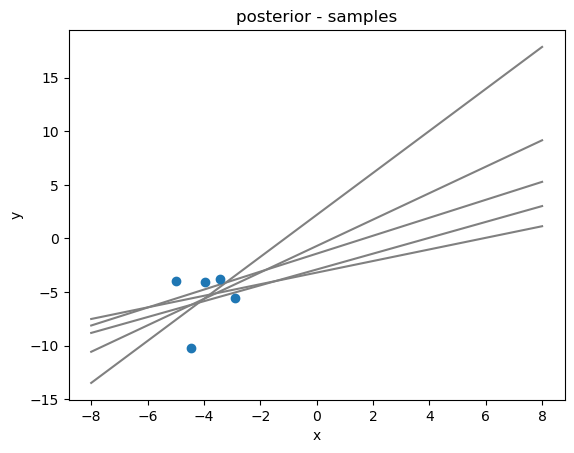

In [34]:
# Generate grid of new inputs x* for plotting
n = 100  # number of grid-points
xs1 = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws1 = stats.multivariate_normal(mean=mN1, cov=SN1, allow_singular=True).rvs(samples, random_state=seed)
print(ws1.shape)

# Compute corresponding values f(x*)
fs1 = Phi(xs1) @ ws1.T

# Plot the samples
plt.plot(xs1, fs1, 'gray') # samples
plt.scatter(x1, y1, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(100, 100)


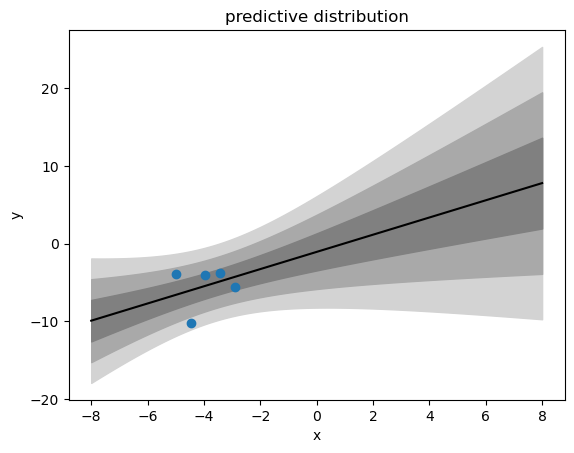

In [ ]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar1 = Phi(xs1) @ mN1
Sstar1 = Phi(xs1) @ SN1 @ Phi(xs1).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred1= np.sqrt(np.diag(Sstar1))

# Plot credibility regions
plt.plot(xs1, mstar1, 'black') # predictive mean
plt.fill_between(xs1, mstar1 + 3*stdpred1, mstar1 - 3*stdpred1, color='lightgray')
plt.fill_between(xs1, mstar1 + 2*stdpred1, mstar1 - 2*stdpred1, color='darkgray')
plt.fill_between(xs1, mstar1 + 1*stdpred1, mstar1 - 1*stdpred1, color='gray')
plt.scatter(x1, y1, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Using only 5 data points makes the model very uncertain far away from the data points. The predictive distribution is quite certain near the data points but far away the uncertainity grows.

## Exercise 3.2: Feature vectors

### (a)

Load `nlindata.mat` instead of `lindata.mat` and run the code for this data.
Use all data, not only the first five data points as in Exercise 3.1 (b).
Do you think the model performs well on this data?

(20,)
(20,)


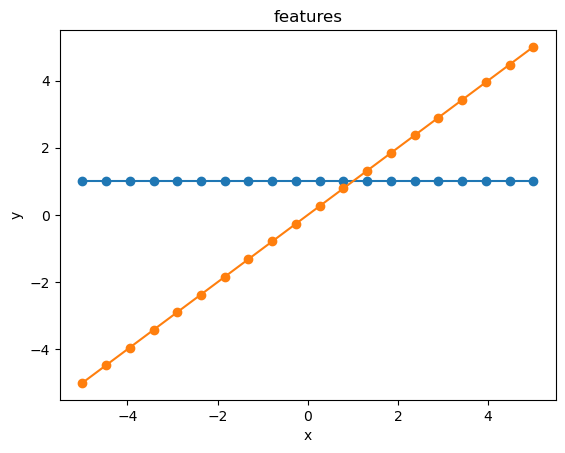

In [45]:
# Load data from disk
# File should be in the same folder as the Jupyter notebook,
# otherwise you have to adjust the path
data2 = spio.loadmat("nlindata.mat")
x2 = data2["X"].flatten() # inputs
y2 = data2["Y"].flatten() # outputs
print(x2.shape)
print(y2.shape)
N2 = x2.size

# Plot the features
plt.plot(x2, Phi(x2), '-o')
plt.title('features')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D2 = Phi(0).size  # number of features
m02 = np.zeros(D2)
S02 = 10*np.eye(D2) / D2
print(S02)

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
print(Phi(x2).shape)
SN2 = np.linalg.inv(np.linalg.inv(S02) + beta * Phi(x2).T @ Phi(x2))
mN2 = SN2 @ (np.linalg.inv(S02) @ m02 + beta * Phi(x2).T @ y2)

[[5. 0.]
 [0. 5.]]
(20, 2)


(5, 2)


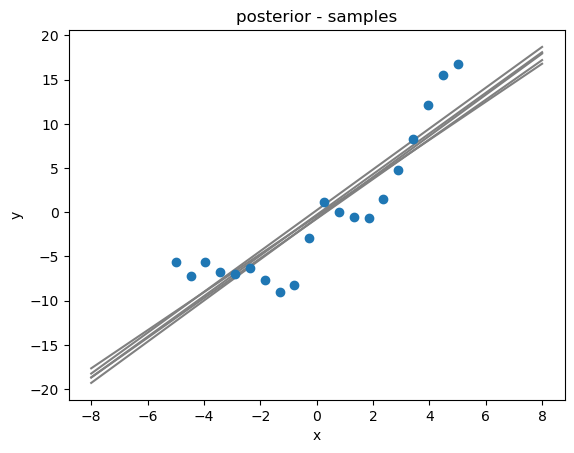

In [47]:
# Generate grid of new inputs x* for plotting
xs2 = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws2 = stats.multivariate_normal(mean=mN2, cov=SN2, allow_singular=True).rvs(samples, random_state=seed)
print(ws2.shape)

# Compute corresponding values f(x*)
fs2 = Phi(xs2) @ ws2.T

# Plot the samples
plt.plot(xs2, fs2, 'gray') # samples
plt.scatter(x2, y2, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

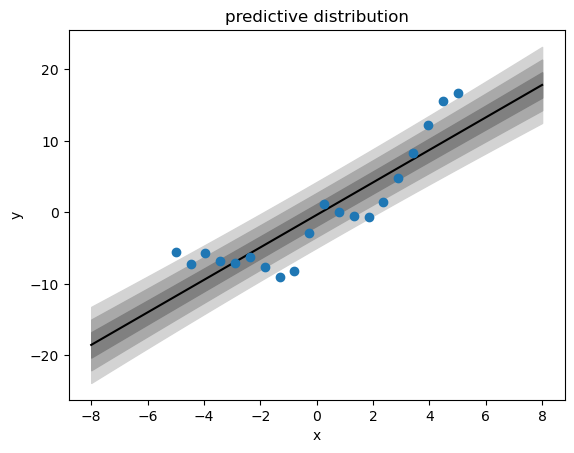

In [44]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar2 = Phi(xs2) @ mN2
Sstar2 = Phi(xs2) @ SN2 @ Phi(xs2).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred2= np.sqrt(np.diag(Sstar2))

# Plot credibility regions
plt.plot(xs2, mstar2, 'black') # predictive mean
plt.fill_between(xs2, mstar2 + 3*stdpred2, mstar2 - 3*stdpred2, color='lightgray')
plt.fill_between(xs2, mstar2 + 2*stdpred2, mstar2 - 2*stdpred2, color='darkgray')
plt.fill_between(xs2, mstar2 + 1*stdpred2, mstar2 - 1*stdpred2, color='gray')
plt.scatter(x2, y2, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This model does not fit the data very well as we see there is more of a non linear trend

### (b)

In order to improve the performance, consider instead a feature vector with an additional quadratic term

$$
\boldsymbol{\phi}(x)^{\mathsf{T}} = [1, x, x^2].
$$

Change the code accordingly and run it.

*Hint:* Only a very minor modification in the code is required to accommodate for this change.

In [ ]:
# Define the feature vector
def Phix2(a):  # Phi(a) = [1, a]
    return np.power(np.reshape(a, (-1, 1)), range(3))

array([[1, 3, 9]])

In [51]:
# Define the prior on the weights
# p(w) = N(w; m0, S0)
D3 = Phix2(0).size  # number of features
m03 = np.zeros(D3)
S03 = 10*np.eye(D3) / D3
print(S03)

# Compute the posterior distribution of the Bayesian linear regression model
# p(w | y) = N(w; mN, SN)
print(Phix2(x2).shape)
SN3 = np.linalg.inv(np.linalg.inv(S03) + beta * Phi(x2).T @ Phi(x2))
mN3 = SN3 @ (np.linalg.inv(S03) @ m03 + beta * Phi(x2).T @ y2)

[[3.33333333 0.         0.        ]
 [0.         3.33333333 0.        ]
 [0.         0.         3.33333333]]
(20, 3)


(5, 3)


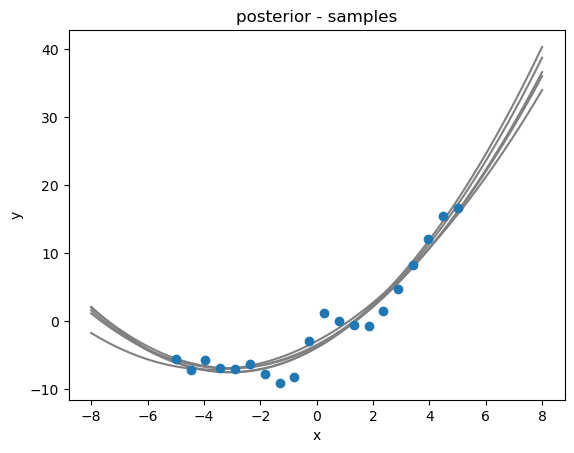

In [52]:
# Generate grid of new inputs x* for plotting
xs3 = np.linspace(-8, 8, n)

# Visualize the posterior p(w | y) = N(w; mN, SN)
# For samples of w, f(x) = phi(x)^T w is evaluated at inputs xs
# Draw samples of w from the posterior
samples = 5
seed = 100
ws3 = stats.multivariate_normal(mean=mN3, cov=SN3, allow_singular=True).rvs(samples, random_state=seed)
print(ws3.shape)

# Compute corresponding values f(x*)
fs3 = Phix2(xs3) @ ws3.T

# Plot the samples
plt.plot(xs3, fs3, 'gray') # samples
plt.scatter(x2, y2, zorder=3)
plt.title('posterior - samples')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

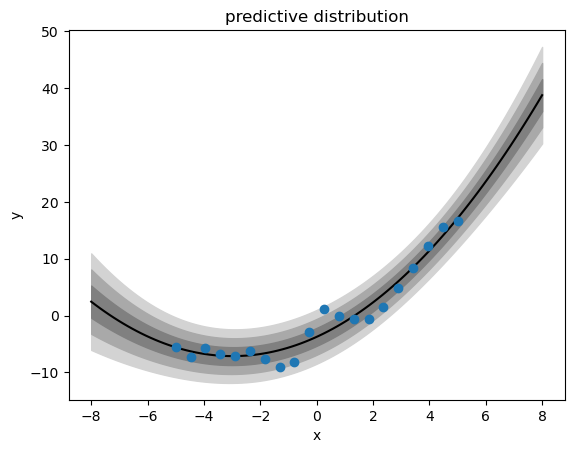

In [53]:
# Compute the predictive distribution of the outputs y*
# p(y* | y) = N(y*; m*, S*)
mstar3 = Phi(xs3) @ mN3
Sstar3 = Phi(xs3) @ SN3 @ Phi(xs3).T + beta**(-1) * np.eye(n)

# Extract standard deviation of predictive distribution
stdpred3= np.sqrt(np.diag(Sstar3))

# Plot credibility regions
plt.plot(xs3, mstar3, 'black') # predictive mean
plt.fill_between(xs3, mstar3 + 3*stdpred3, mstar3 - 3*stdpred3, color='lightgray')
plt.fill_between(xs3, mstar3 + 2*stdpred3, mstar3 - 2*stdpred3, color='darkgray')
plt.fill_between(xs3, mstar3 + 1*stdpred3, mstar3 - 1*stdpred3, color='gray')
plt.scatter(x2, y2, zorder=3)
plt.title('predictive distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The addition of $x^2$ fits a better model

### (c)

Use step functions

$$
h(x) = \begin{cases}
1, \qquad x \geq 0,\\
0, \qquad x < 0,
\end{cases}
$$

as features and change the code accordingly.
Place in total 9 of these features with two steps apart between $x = -8$ and $x = 8$.
The feature vector is then

$$
\boldsymbol{\phi}(x)^{\mathsf{T}} = [h(x-8), h(x - 6), \ldots, h(x + 8)].
$$

In [120]:
# Define the feature vector
def Phistep(a):  # Phi(a) = [1,1,1,1,1,1,1,1,1] for x = 8, x = 1 [0,0,0,0,1,1,1,1,1], x = -1 [0,0,0,0,0,1,1,1,1]
    if a >= -1:
        pos = np.ceil(-1*(a - 8)/2)
    else: 
        pos = np.ceil((8 - a)/2)-1
    return pos

Phistep(-2)
    

4.0

### (d)

Can you come up with any other features that improve performance even further?

## Exercise 3.3: Marginal likelihood

To get a quantitative measure of the performance of the proposed feature vectors, we want to compare them by computing the marginal likelihood $p(\mathbf{y})$ for each of the models.
Refer to Exercise 2.12(a) for the expression of the marginal likelihood of the Bayesian linear regression model.

### (a)

Extend the code to also compute the logarithm of the marginal likelihood.
Which one of the three feature vectors in Exercise 3.2 gives the largest log marginal likelihood on the data `nlindata.mat`?

### (b)

Perform the same comparison on the data `lindata.mat`.
What are your conclusions?

### (c)

Can you come up with any other feature vectors and/or values for prior/likelihood precisions that give an even larger log marginal likelihood?